In [1]:
# open ./iris_dataset.csv and transform it into a txt file.
# remove header (sepal_length,sepal_width,petal_length,petal_width,species)
# transform species into a number (Iris-setosa -> 0, Iris-versicolor -> 1, Iris-virginica -> 2)

import csv

def species_to_number(species):
    if species == 'setosa':
        return 0
    elif species == 'versicolor':
        return 1
    elif species == 'virginica':
        return 2
    else:
        return -1
    
with open('iris_dataset.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    with open('iris_dataset.txt', 'w') as txt_file:
        for line in csv_reader:
            txt_file.write(f'{line[0]} {line[1]} {line[2]} {line[3]} {species_to_number(line[4])}\n')

print('Done!')

Done!


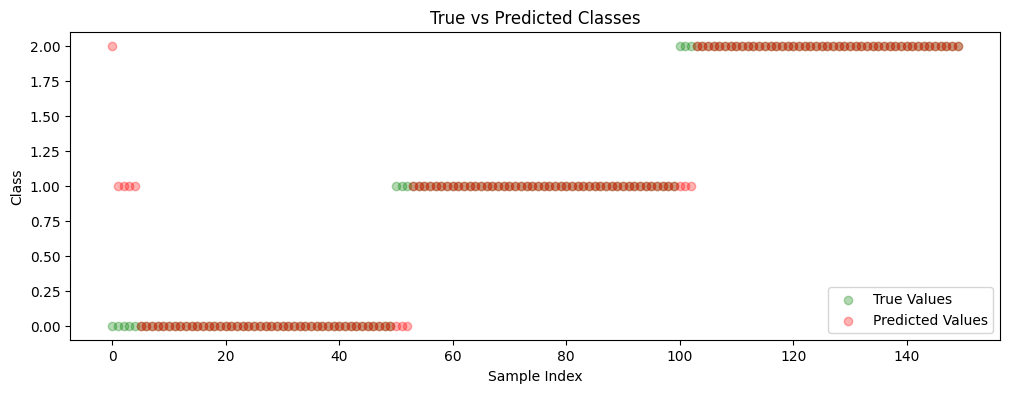

Percencentage of correctly classified points: 92.67%


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

predictions = pd.read_csv('final_output.txt', header=None, names=['predicted'])
iris_data = pd.read_csv('iris_dataset.txt', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'],sep=' ')
true_values = iris_data['species']

# Round predictions to the nearest integer
predictions['rounded'] = predictions['predicted'].round().astype(int)

# Confront predictions and true_values
incorrect_classifications = (predictions['rounded'] != true_values).sum()
accuracy = 100 * (1 - incorrect_classifications / len(true_values))

# Visualize results
plt.figure(figsize=(12,4))
plt.scatter(range(len(true_values)), true_values, color='green', alpha=0.3, label='True Values')
plt.scatter(range(len(predictions)), predictions['rounded'], color='red', alpha=0.3, label='Predicted Values')
plt.title('True vs Predicted Classes')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()

print(f"Percencentage of correctly classified points: {accuracy:.2f}%")
